In [2]:
import pandas as pd
import re

In [5]:
estimate = pd.read_csv('archive/weekly sentiments.csv')
pred1 = pd.read_csv('archive/weekly_arrest.csv')
pred2 = pd.read_csv('archive/weekly_crime.csv')
pred3 = pd.read_csv('archive/temperature.csv')

In [153]:
pred1['Month'] = pred1['Month'].apply(lambda x: (re.sub('\d', '', x)))

In [11]:
all_var = pd.concat([pred1[['Week #','Arrest']],pred2['Crime'],pred3['temperature'], 
                     estimate['Sentiment']],axis=1)

In [12]:
all_var

,Week #,Arrest,Crime,temperature,Sentiment
0,1,1571,4356,57.9,0.149070
1,2,1684,4066,57.9,0.125827
2,3,1511,4107,57.9,0.125000
3,4,1858,4153,57.9,0.136324
4,5,1767,4219,57.9,0.127456
5,6,1667,3955,54.0,0.129769
6,7,1592,4050,54.0,0.153589
7,8,1727,4020,54.0,0.134988
8,9,1757,4349,61.1,0.130477
9,10,1872,4019,61.1,0.136206


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Week #', ylabel='Sentiment'>

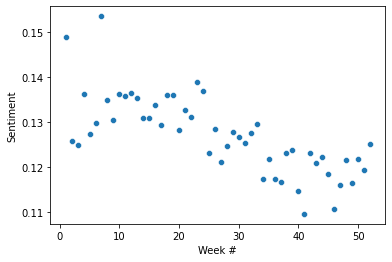

In [16]:
sns.scatterplot(data=all_var, x="Week #", y="Sentiment")

<AxesSubplot:xlabel='Arrest', ylabel='Sentiment'>

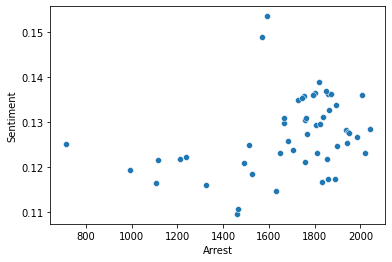

In [17]:
sns.scatterplot(data=all_var, x="Arrest", y="Sentiment")

<AxesSubplot:xlabel='Crime', ylabel='Sentiment'>

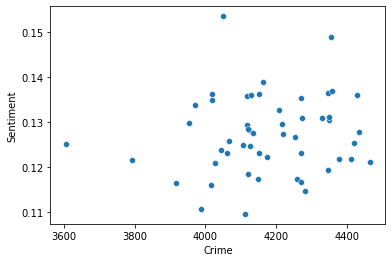

In [18]:
sns.scatterplot(data=all_var, x="Crime", y="Sentiment")

<AxesSubplot:xlabel='temperature', ylabel='Sentiment'>

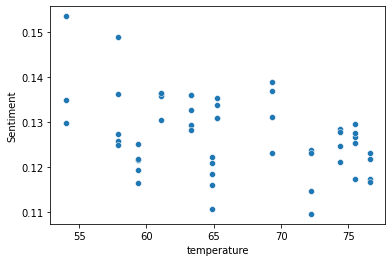

In [19]:
sns.scatterplot(data=all_var, x="temperature", y="Sentiment")

## Sampling with replacement
B/c of the size of the dataset, a resampling method is used to increase the validity of results generated from  various statistical models. 

In [26]:
def resample(n,df):
    trial = 0
    while trial < n: 
        df = df.append(df.sample(n=50, random_state=1,replace=True))
        trial+=1
        
    return df 

In [27]:
sampled = resample(10,all_var)

In [28]:
sampled

,Week #,Arrest,Crime,temperature,Sentiment
0,1,1571,4356,57.9,0.149070
1,2,1684,4066,57.9,0.125827
2,3,1511,4107,57.9,0.125000
3,4,1858,4153,57.9,0.136324
4,5,1767,4219,57.9,0.127456
...,...,...,...,...,...
11,12,1803,4347,61.1,0.136627
1,2,1684,4066,57.9,0.125827
8,9,1757,4349,61.1,0.130477
37,38,1811,4151,76.6,0.123170


## Correlation

In [29]:
X = sampled[['Arrest','Crime','temperature']]
y = sampled['Sentiment']

In [30]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Sentiment   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          6.087e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                        0.00
Time:                        17:14:46   Log-Likelihood:                          1937.9
No. Observations:                 552   AIC:                                     -3870.
Df Residuals:                     549   BIC:                                     -3857.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Linear Regression
https://stackabuse.com/linear-regression-in-python-with-scikit-learn

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg = regressor.fit(X_train, y_train)

In [34]:
reg.score(X, y)

0.42076807100463065

#### Prediction 

In [35]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
32,0.129611,0.124621
11,0.136627,0.137407
24,0.123181,0.133790
5,0.129769,0.136646
20,0.132650,0.135193
...,...,...
11,0.136627,0.137407
11,0.136627,0.137407
29,0.126692,0.127903
50,0.119368,0.124309


#### Evaluation

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.004425134197698526
Mean Squared Error: 3.781847938348459e-05


## Random Forests  ==> best model

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor(max_depth=3, random_state=0).fit(X_train, y_train)

In [39]:
rf.score(X_train, y_train)

0.8585231729466578

In [40]:
y_pred = rf.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
32,0.129611,0.124084
11,0.136627,0.133932
24,0.123181,0.133932
5,0.129769,0.133376
20,0.132650,0.133932
...,...,...
11,0.136627,0.133932
11,0.136627,0.133932
29,0.126692,0.124701
50,0.119368,0.119874


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.002483940926543922
Mean Squared Error: 1.1292341528310894e-05


## SVM 

In [42]:
from sklearn.svm import SVR

In [43]:
svr = SVR(kernel='linear', C=100, gamma='auto').fit(X_train, y_train)

In [44]:
svr.score(X_train, y_train)

-0.0012078849523642354

In [45]:
y_pred = svr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
32,0.129611,0.131631
11,0.136627,0.131631
24,0.123181,0.131631
5,0.129769,0.131631
20,0.132650,0.131631
...,...,...
11,0.136627,0.131631
11,0.136627,0.131631
29,0.126692,0.131631
50,0.119368,0.131631


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.006595227629637385
Mean Squared Error: 6.763100650583911e-05


In [38]:
pip install statsmodels

     |████████████████████████████████| 9.6 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 43.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
